### 필수과제
- KNN 회귀, 다중회귀
- 이 두가지의 모델링을 가지고 예측 값을 비교한다.
- train, test를 나눠서 예측값을 비교하고 비교는 RMSE 그 외 지표를 비교해도 됩니다.
- 예측값이 나오면 잔차 비교가 가능하다.
- 잔차에 대한 정규성, 등분산성, 독립성 등을 체크해서 코드와 주석을 달아 정리해주세요.

- 본인만의 로직으로 변수들을 선택해서 해당 변수를 선택한 후에 KNN, 다중회귀를 진행하는 것
- 예측 -> 예측값을 가지고 잔차에 대한 검정, RMSE 예측값도 비교!
- 발표할 예정이고, 랜덤으로 지정하겠습니다.

- 변수 선택, 스케일링 등
- KNN 회귀
-- train, test로 나눠서 모델링 -> MSE로 비교해서 최적의 k 찾기
-- 최적의 k에 대한 예측값의 잔차로 정규성, 등분산성, 독립성 체크
- 다중 회귀
-- 모델링, 예측 -> MSE 구하기
- KNN 회귀, 다중 회귀 비교

In [130]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from math import sqrt

In [2]:
boston = pd.read_csv('boston_house.csv')

In [3]:
boston

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,6.593,0.06263,2.4786,11.93,9.67,0.573,21.0,1,0.0,273,0,22.4
502,76.7,396.90,6.120,0.04527,2.2875,11.93,9.08,0.573,21.0,1,0.0,273,0,20.6
503,91.0,396.90,6.976,0.06076,2.1675,11.93,5.64,0.573,21.0,1,0.0,273,0,23.9
504,89.3,393.45,6.794,0.10959,2.3889,11.93,6.48,0.573,21.0,1,0.0,273,0,22.0


- CRIM: 범죄율 
- INDUS: 비소매상업지역 면적 비율 
- NOX: 일산화질소 농도 
- RM: 주택당 방 수 
- LSTAT: 인구 중 하위 계층 비율 
- B: 인구 중 흑인 비율 
- PTRATIO: 학생/교사 비율 
- ZN: 25,000 평방피트를 초과 거주지역 비율 
- CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0 
- AGE: 1940년 이전에 건축된 주택의 비율 
- RAD: 방사형 고속도로까지의 거리 
- DIS: 직업센터의 거리 
- TAX: 재산세율

In [4]:
bst_feature = ['AGE', 'B', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'ZN', 'TAX', 'CHAS']

### 변수 선택
- 변수 간 상관관계가 높은 변수는 분석에서 제외

<AxesSubplot:>

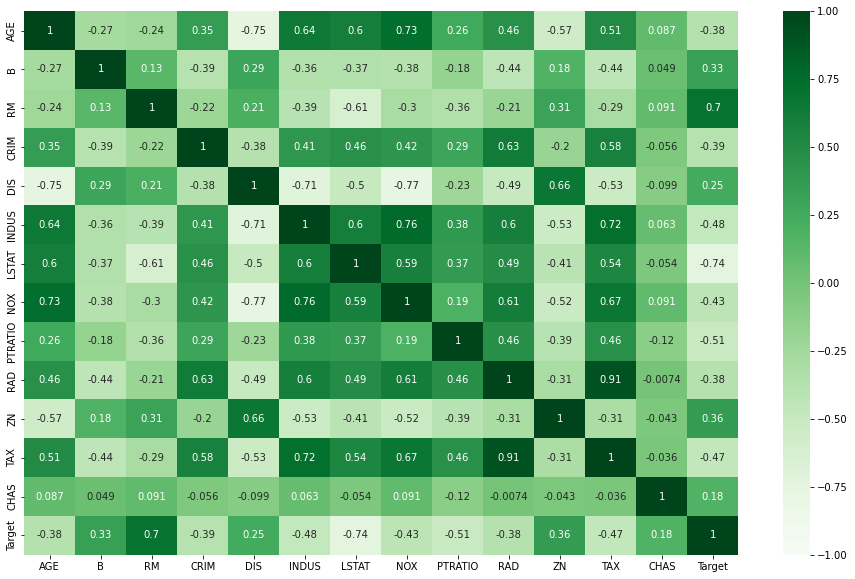

In [24]:
grid = gridspec.GridSpec(4,4)
plt.figure(figsize=(16,10))
plt.subplots_adjust(wspace= 0.5, hspace= 0.4)

plt.rcParams['figure.figsize']=(10,10)
sns.heatmap(boston.corr(),
           annot= True,
           cmap= 'Greens',
           vmin = -1, vmax= 1)

- 양의 상관관계 : [AGE, NOX], [INDUS, TAX], [RAD, TAX], [INDUS, NOX]
- 음의 상관관계 : [AGE, DIS], [DIS, INDUS], [DIS, NOX]

- (AGE, INDUS, NOX),  (RAD, TAX)가 비슷한 분포를 보이며, INDUS와 TAX도 유사하다.
- DIS는 (AGE, INDUS, NOX)와 반비례하는 경향이 있다.

- 변수 선택 : ['AGE', 'B', 'RM', 'CRIM', 'LSTAT', 'PTRATIO', 'RAD', 'TAX', 'CHAS']

In [140]:
bst_feature = ['AGE', 'B', 'RM', 'CRIM', 'LSTAT', 'PTRATIO', 'RAD', 'TAX', 'CHAS']

- (AGE, PTRATIO, RAD, ZN, TAX) : Standard 스케일링
- (B, RM, CRIM, LSTAT) : 로그 스케일링
- CHAS는 스케일링하지 않음

In [142]:
scaler = StandardScaler()
boston_lg1=np.log1p(boston[['B','CRIM','RM','LSTAT']])

scaler.fit(boston[['AGE','PTRATIO','RAD','TAX']])
boston_sc1 =scaler.transform(boston[['AGE','PTRATIO','RAD','TAX']])

In [143]:
boston_sc1

array([[-0.12001342, -1.45900038, -0.98284286, -0.66660821],
       [ 0.36716642, -0.30309415, -0.8678825 , -0.98732948],
       [-0.26581176, -0.30309415, -0.8678825 , -0.98732948],
       ...,
       [ 0.79744934,  1.17646583, -0.98284286, -0.80321172],
       [ 0.73699637,  1.17646583, -0.98284286, -0.80321172],
       [ 0.43473151,  1.17646583, -0.98284286, -0.80321172]])

In [144]:
boston_sc1= pd.DataFrame(boston_sc1,columns=['AGE','PTRATIO','RAD','TAX'])
boston_1 = pd.concat([boston_lg1, boston_sc1, boston.CHAS, boston.Target], axis=1)

In [145]:
boston_1

,B,CRIM,RM,LSTAT,AGE,PTRATIO,RAD,TAX,CHAS,Target
0,5.986201,0.006300,2.024853,1.788421,-0.120013,-1.459000,-0.982843,-0.666608,0,24.0
1,5.986201,0.026944,2.004314,2.316488,0.367166,-0.303094,-0.867883,-0.987329,0,21.6
2,5.975919,0.026924,2.102303,1.615420,-0.265812,-0.303094,-0.867883,-0.987329,0,34.7
3,5.980479,0.031857,2.079192,1.371181,-0.809889,0.113032,-0.752922,-1.106115,0,33.4
4,5.986201,0.066770,2.097650,1.845300,-0.511180,0.113032,-0.752922,-1.106115,0,36.2
...,...,...,...,...,...,...,...,...,...,...
501,5.973784,0.060747,2.027227,2.367436,0.018673,1.176466,-0.982843,-0.803212,0,22.4
502,5.986201,0.044275,1.962908,2.310553,0.288933,1.176466,-0.982843,-0.803212,0,20.6
503,5.986201,0.058986,2.076437,1.893112,0.797449,1.176466,-0.982843,-0.803212,0,23.9
504,5.977492,0.103991,2.053354,2.012233,0.736996,1.176466,-0.982843,-0.803212,0,22.0


### KNN 회귀

In [146]:
data = pd.DataFrame(boston_1[bst_feature], columns = bst_feature)
target = pd.DataFrame(boston_1['Target'], columns = ['Target'])

df = pd.concat([data,target], axis=1)

In [212]:
X_train, x_test, y_train, y_test = train_test_split(df[bst_feature], df.Target, test_size=0.3)

In [213]:
rmse_val =[]
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K,weights='distance')
    model.fit(X_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value k',K,'=',error)
print('가장최소 rmse',min(rmse_val), '가장 최소 k', rmse_val.index(min(rmse_val))+1)

RMSE value k 1 = 6.1501123224659375
RMSE value k 2 = 5.203700538873535
RMSE value k 3 = 4.62255635634137
RMSE value k 4 = 4.46820129016923
RMSE value k 5 = 4.549482022542521
RMSE value k 6 = 4.423394587055542
RMSE value k 7 = 4.4513934466760965
RMSE value k 8 = 4.458612988667779
RMSE value k 9 = 4.548591016658157
RMSE value k 10 = 4.542582534785626
RMSE value k 11 = 4.539281100890424
RMSE value k 12 = 4.5888619153273025
RMSE value k 13 = 4.6691861043143845
RMSE value k 14 = 4.768286765434816
RMSE value k 15 = 4.836403855665842
RMSE value k 16 = 4.895585340875461
RMSE value k 17 = 4.920779580024878
RMSE value k 18 = 4.896568691672927
RMSE value k 19 = 4.940518028047511
RMSE value k 20 = 4.948669576226986
가장최소 rmse 4.423394587055542 가장 최소 k 6


- k=6 선택

In [221]:
model = KNeighborsRegressor(n_neighbors=6, weights='distance')
res = model.fit(X_train, y_train)
pred = model.predict(x_test)
errors = y_test-pred
rmse1 = sqrt(mean_squared_error(y_test,pred))
print(rmse1)

4.423394587055542


(array([ 5., 14., 39., 49., 24.,  9.,  5.,  3.,  3.,  1.]),
 array([-9.26811591, -6.51260641, -3.75709691, -1.0015874 ,  1.7539221 ,
         4.5094316 ,  7.2649411 , 10.02045061, 12.77596011, 15.53146961,
        18.28697911]),
 <BarContainer object of 10 artists>)

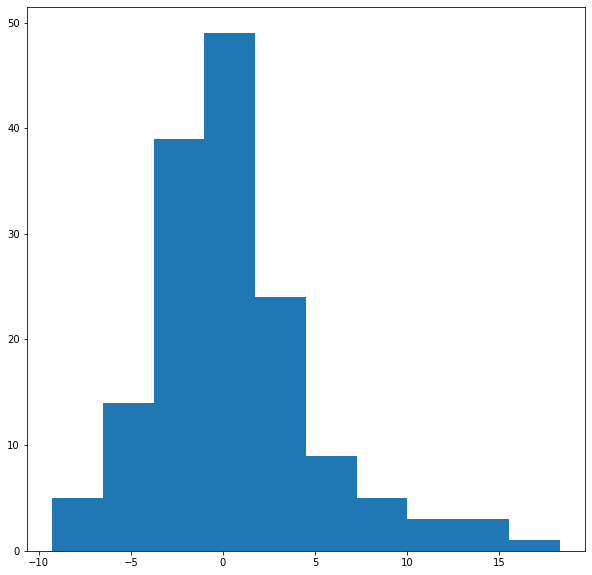

In [217]:
plt.hist(errors, bins=10)

- 극단값을 제외하면 잔차에 대한 정규성 및 등분산성이 성립됨을 확인할 수 있다.

In [219]:
boston_2 = boston_1[bst_feature]

vif = pd.DataFrame()
vif["VIF factor"] = [variance_inflation_factor(boston_2, i) for i in range(boston_2.shape[1])]
vif["features"] = boston_2.columns
vif = vif.sort_values("VIF factor").reset_index(drop=True)
vif

,VIF factor,features
0,1.132020,CHAS
1,1.458915,PTRATIO
2,1.796215,AGE
3,6.587298,TAX
4,9.993261,RAD
5,11.779517,CRIM
6,34.755770,LSTAT
7,69.079852,B
8,82.620993,RM


- RM, B, LSTAT의 VIF가 높지만, 제거하지 않고 진행
- CRIM, RAD의 VIF가 10에 가깝지만, 제거하지 않고 진행

- 다중공선성 문제 때문에 잔차의 독립성은 완전히 성립되지는 않음을 확인할 수 있다.

### 다중 회귀

In [220]:
model2 = sm.OLS.from_formula("Target~"+"+".join(bst_feature), data=boston_1)
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     170.5
Date:                Sat, 01 Jul 2023   Prob (F-statistic):          1.24e-145
Time:                        10:45:41   Log-Likelihood:                -1483.6
No. Observations:                 506   AIC:                             2987.
Df Residuals:                     496   BIC:                             3030.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.8507      7.570      1.962      0.050      -0.023      29.724
AGE            1.5505      0.291      5.332      0.000       0.979       2.122
B              0.9883      0.316      3.124      0.002       0.367       1.610
RM            15.5767      2.979      5.229      0.000       9.724      21.430
CRIM          -1.3507      0.545     -2.477      0.014      -2.422      -0.279
LSTAT        -11.2829      0.671    -16.817      0.000     -12.601      -9.965
PTRATIO       -1.8558      0.248     -7.490      0.000      -2.343      -1.369
RAD            3.0761      0.655      4.693      0.000       1.788       4.364
TAX           -1.8791      0.525     -3.581      0.000      -2.910      -0.848
CHAS           2.3266      0.825      2.820      0.005       0.705       3.948
==============================================================================
Omnibus:                      142.872   Durbin-Watson:                   1.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              518.265
Skew:                           1.260   Prob(JB):                    2.89e-113
Kurtosis:                       7.270   Cond. No.                         267.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [228]:
sqrt(res2.mse_resid)

4.586540174632763

### KNN 회귀 vs. 다중회귀
- KNN 회귀에서의 rmse가 더 작지만, 차이는 거의 없다.
- KNN 회귀는 거리기반으로 k개 이웃을 찾고 k개의 정답의 평균을 예측값으로 계산하지만,
- 다중회귀는 최소제곱추정법으로 회귀계수의 값을 구한다.